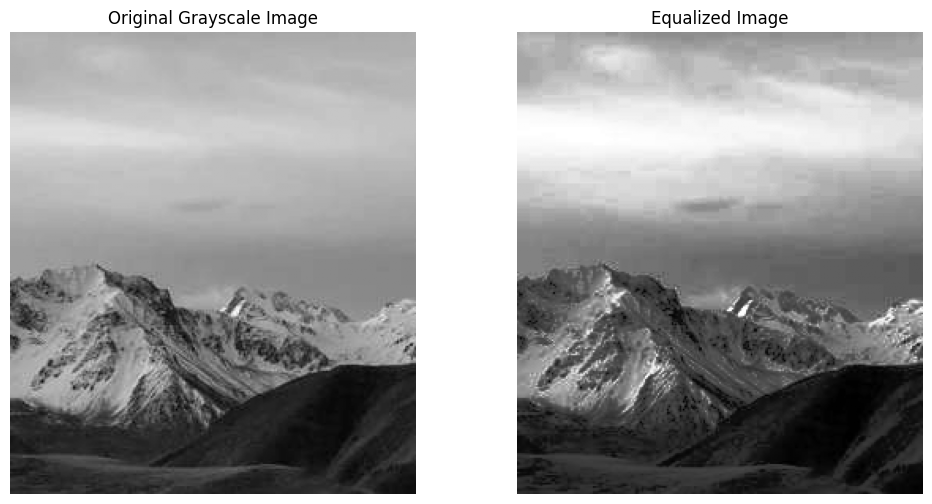

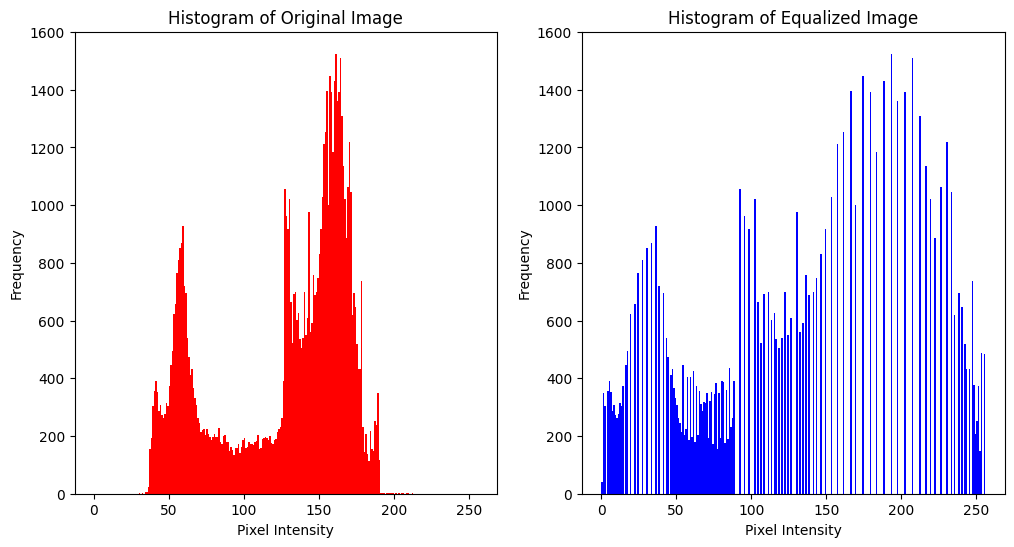

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the specified image
try:
    original_image = cv2.imread('/content/image 4.jpg', cv2.IMREAD_GRAYSCALE)
    if original_image is None:
        raise FileNotFoundError("Image file '/content/image 4.jpg' not found or could not be loaded.")
except FileNotFoundError as e:
    print(e)
    print("Falling back to a generated gradient image for demonstration.")
    # Fallback to a generated gradient image if the specified image is not found
    original_image = np.zeros((200, 256), dtype=np.uint8)
    for i in range(256):
        original_image[:, i] = i

# Ensure the image is grayscale (already handled by IMREAD_GRAYSCALE, but good for robustness)
if len(original_image.shape) == 3:
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
else:
    gray_image = original_image

# Apply histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Display the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

# Optional: Display histograms for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(gray_image.flatten(), 256, range=[0, 256], color='r')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(equalized_image.flatten(), 256, range=[0, 256], color='b')
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()